# Analiza podataka


Prvo što je neophodno jeste da se učitaju biblioteke koje će se koristiti u vršenju analite i vizuelizacije podataka. Takođe smo definisali maksimalan broj kolone koje mogu da se vide na 50 kako bismo mogli da vidimo sve kolone koje se nalaze u ovom skupu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=50

Sada ćemo da učitamo skup podataka `Bank Marketing` i to u promenljivu `banks` i pozvati neke osnovne metode za dobijanje informacija o samom skupu podataka.

In [2]:
banks=pd.read_csv('Bank Marketing/bank-additional.csv', sep=';')

In [3]:
banks.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128.0,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290.0,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68.0,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


In [4]:
banks.shape

(4119, 21)

In [5]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

Nakon dobijanja osnovnih informacija o skupu podataka uz pomoć ovih funkcija, a takođe i čitanjem šifranika dobijenog pored skupe dobijamo jednu vrlo bitnu informaciju koja je vezana za atribut `duration`. Ovaj atribut u velikoj meri utiče na izlazni atribut ovog modela (`y`-da li se klijent uplatio oročeni depozit), jer ukoliko je trajanje poziva jednako 0 tj. poziv nije postojao onda njemu ta ponuda nije ni bila poznata. Samim tim ovaj atribut ćemo koristiti da bismo izvukli neke informacije o klijentima, ali ga nećemo koristiti u kreiranju modela.

In [6]:
banks.duration.head()

0    487.0
1    346.0
2    227.0
3     17.0
4     58.0
Name: duration, dtype: float64

In [7]:
banks[banks.duration==0].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Pošto smo našli jednu osobu koja je imala atribut `duration` jednak 0, tu osobu ćemo izbaciti iz analize.

In [8]:
banks=banks[banks.duration!=0]

Takođe ćemo promeniti ime izlazne promenljive kako bismo znali na šta se tačno odnosi bez korišćenja šifranika.

In [9]:
banks=banks.rename(columns={'y':'subscribed?'})

In [10]:
banks.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed?
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [11]:
banks.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
subscribed?        object
dtype: object

Možemo da odradimo neke osnovne deskriptivne statistike nad ovim skupom.

In [12]:
banks.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4118.000000,4115.000000,4113.000000,4118.000000,4116.000000,4115.000000,4116.000000,4116.000000,4116.000000
mean,40.113890,256.931470,2.533917,960.412822,0.190476,0.084447,93.579439,-40.487350,4.858993
std,10.314599,254.763392,2.566883,191.945151,0.541961,1.563470,0.579476,4.639967,79.442107
min,18.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.500000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


Saznali smo neke osnovne deskriptivne statistike. Prva stvar koju primećujemo je da je atribut `nr.employed` definisan kao `object` a trebalo bi kao numerički atribut. S tim u vezi ćemo utvrditi razlog zbog kojeg je `Pandas` njega definisao kao `object`.

In [13]:
banks['nr.employed'].value_counts()

5228.1    1625
5099.1     822
5191       757
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
no           1
5176.3       1
Name: nr.employed, dtype: int64

In [14]:
banks[banks['nr.employed']=='no']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed?
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [15]:
banks['euribor3m'].sort_values(ascending=False).head()

780     5099.100
1546       5.045
263        4.970
1598       4.970
270        4.970
Name: euribor3m, dtype: float64

Nakon pozivanja metode `value_counts` utvridli smo da postoji pojavljivanje vrednosti "no" u `nr.employed` atributu. Očigledno je to greška u podacima pa kako bismo videli kako ćemo da je rešimo prvo smo bacili pogled na osobu koji ima ovu vrednost. Kao što može da se primeti ova osoba pored greške u ovom atributu ima i NA vrednost za izlazni atribut. Pošto ima dve vrednosti atributa koje nam nisu od pomoći pri modelovanju razmišljamo o izbacivanju ove osobe iz skupa. Konačnu odluku nam je dala informacija o vrednosti atributa `euribor3m`. Prilikom prikazivanja deskriptivne statistike dobili smo informaciju da je baš vrednost koju ovaj atribut prikazuje maksimalna u ovom skupu podataka, dok informacije o kvaritilima nam pričaju da su to vrednosti znatno manje nego kod ove osobe. Prikazivanjem sortiranih vrednosti svih osoba iz skupa podataka uočavamo da je ovo jedina osoba koja ima ovako visoku vrednost atributa `euribor3m` pa samim tim je moguće da je u pitanju autlajer. Međutim daljom analizom smo došli do toga da je vrlo verovatno da je osoba koja je popunjavala dataset slučajno preskočila jednu od kolona za upis podataka, jer je vrednost "no" koja je dodata atributu `nr.employed` vrlo verovatno trebalo da bude vrednost izlaznog atrbuta, a vrednost 5099.1 je vrlo verovatno trebalo da bude dodeljenja atributu `euribor3m`. Najviše smisla bi bilo da je propuštena vrednost atributa `cons.conf.idx`, ali da ne bismo doveli određeni šum u ovaj skup konačna odluka je da se ova osoba izbaci iz dalje analize.

In [16]:
banks=banks[banks['nr.employed']!='no']

Pošto smo rešili problem atributa `nr.employed` sada možemo da ga konvertujemo u `float`.

In [17]:
pd.options.mode.chained_assignment = None
banks['nr.employed']=pd.to_numeric(banks['nr.employed'], errors='coerce')

In [18]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4114 non-null   float64
 11  campaign        4112 non-null   float64
 12  pdays           4117 non-null   int64  
 13  previous        4115 non-null   float64
 14  poutcome        4117 non-null   object 
 15  emp.var.rate    4114 non-null   float64
 16  cons.price.idx  4115 non-null   float64
 17  cons.conf.idx   4115 non-null   f

In [19]:
banks.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4117.000000,4114.000000,4112.000000,4117.000000,4115.000000,4114.000000,4115.000000,4115.000000,4115.000000,4116.000000
mean,40.115861,256.974477,2.533560,960.403449,0.190522,0.084905,93.579606,-40.497497,3.621025,5166.477138
std,10.315077,254.779420,2.567094,191.967524,0.542019,1.563384,0.579447,4.594634,1.733722,73.680013
min,18.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Pre nego što se pozabavimo pojedinačnom analizom atributa, proverićemo da li postoje neke nepostojeće vrednosti i videti da li možemo nekako da ih obradimo.

In [20]:
banks.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
subscribed?       0
dtype: int64

Pošto se sve NA vrednosti nalaze u atributima koji su kontinualni, možemo da ih se rešimo tako što ćemo ih zameniti sa vrednošću artimetičke sredine tih atributa.

In [21]:
banks.duration=banks.duration.fillna(banks.duration.mean())
banks.campaign=banks.campaign.fillna(banks.campaign.mean())
banks.previous=banks.previous.fillna(banks.previous.mean())
banks['emp.var.rate']=banks['emp.var.rate'].fillna(banks['emp.var.rate'].mean())
banks['cons.price.idx']=banks['cons.price.idx'].fillna(banks['cons.price.idx'].mean())
banks['euribor3m']=banks['euribor3m'].fillna(banks['euribor3m'].mean())
banks['cons.conf.idx']=banks['cons.conf.idx'].fillna(banks['cons.conf.idx'].mean())
banks['nr.employed']=banks['nr.employed'].fillna(banks['nr.employed'].mean())

In [22]:
banks.isna().sum().sum()


0

Uspešno smo rešili problem nedostajućih vrednosti. Radi lakšeg korišćenja nekih atributa, promenićemo im imena.

In [23]:
banks=banks.rename(columns={'emp.var.rate':'emp_var_rate',
                   'cons.price.idx':'cons_price_idx',
                   'cons.conf.idx':'cons_conf_idx',
                   'nr.employed':'nr_employed'})

In [24]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'subscribed?'],
      dtype='object')

Sada ćemo da grafički prikažemo neke od ostalih atibuta kako bismo utvrdili još neke zanimljivosti o podacima.

array([[<AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'nr_employed'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>, <AxesSubplot:>]],
      dtype=object)

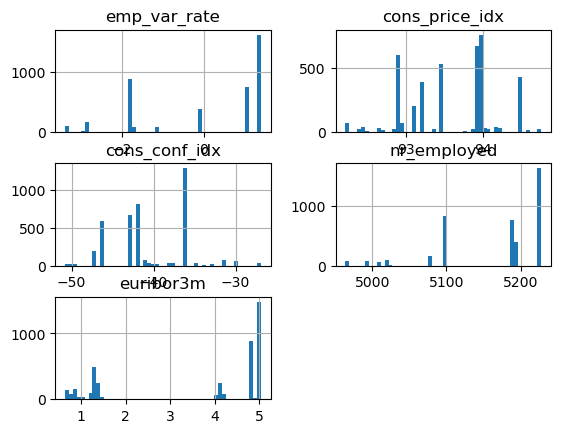

In [25]:
banks[['emp_var_rate','cons_price_idx','cons_conf_idx','nr_employed','euribor3m']].hist(bins=50)

In [26]:
banks.query('euribor3m>2 & euribor3m<3')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed?


Vidimo da su raspodele prve grupe atributa vrlo raštrkane i da nema velike kontinualnosti u njima. Jedan atribut koji baš upada u oko jeste `euribor3m` na kome se jasno vidi da ima veliki jaz između dve grupe vrednosti. Pokušaćemo da ga kategorizujemo tako da postoji jedan grupa čija je vrednost atributa veća od 3, a druga manja od 2.

In [27]:
#kategorizuj euribor3m

<AxesSubplot:>

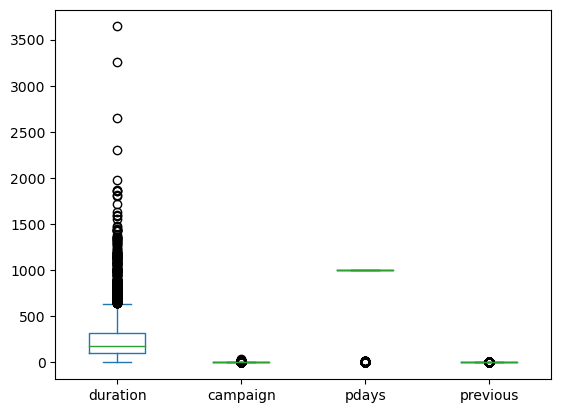

In [28]:
banks[['duration','campaign','pdays','previous']].plot(kind='box')

Sa box-plota saznajemo da svake od ovih prikazanih promenljivih imaju autlajere. Sad cemo da probamo da vidimo svaku pojedinačno i da zaključimo šta možemo sa njima.

<AxesSubplot:>

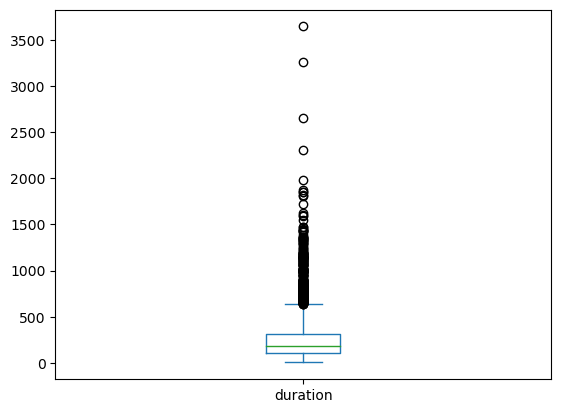

In [29]:
banks['duration'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

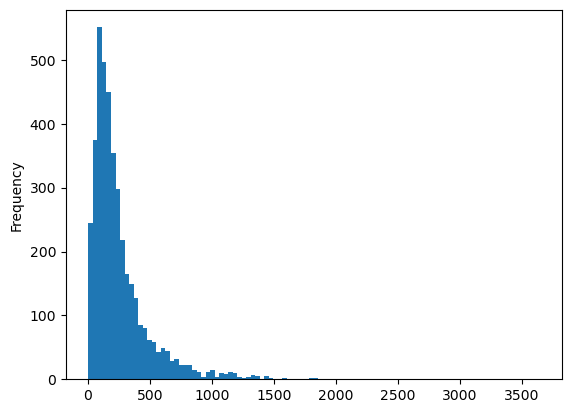

In [30]:
banks['duration'].plot(kind='hist', bins=100)

<AxesSubplot:>

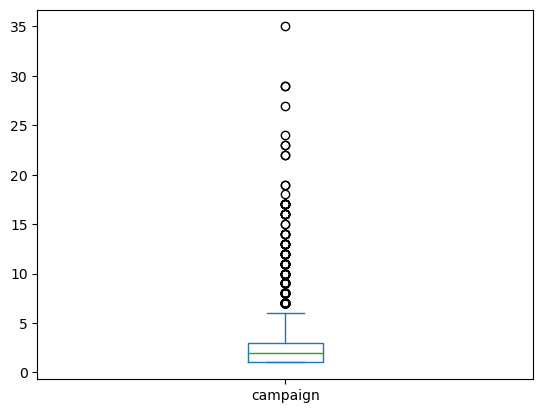

In [31]:
banks['campaign'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

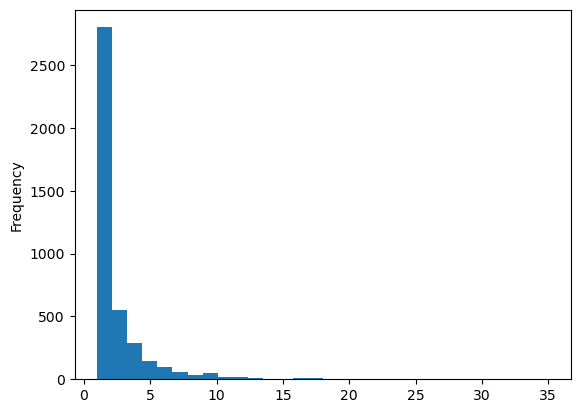

In [32]:
banks['campaign'].plot(kind='hist', bins=30)

In [33]:
banks.campaign.value_counts()

1.00000     1764
2.00000     1038
3.00000      548
4.00000      288
5.00000      142
6.00000       99
7.00000       59
8.00000       36
9.00000       31
10.00000      20
11.00000      19
12.00000      16
17.00000      14
13.00000      11
16.00000       7
14.00000       6
2.53356        5
15.00000       2
22.00000       2
19.00000       2
23.00000       2
29.00000       2
27.00000       1
18.00000       1
24.00000       1
35.00000       1
Name: campaign, dtype: int64

Atribut `campaign` nam ne daje nešto puno informacija kada je dat preko kontunualne skale, pa ćemo samim tim odraditi grupisanje i diskretizovati i formirati tri grupe: vrlo često kontaktirane, često kontaktirane i retko kontaktirane osobe od strane drugih kampanja. Ove vrednosti ćemo smestiti u promenljivu `campaign_groups`.

In [34]:
#diskretizuj campaign promenljivu

<AxesSubplot:>

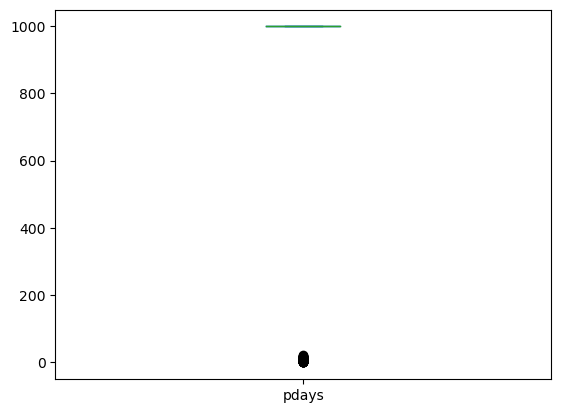

In [35]:
banks['pdays'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

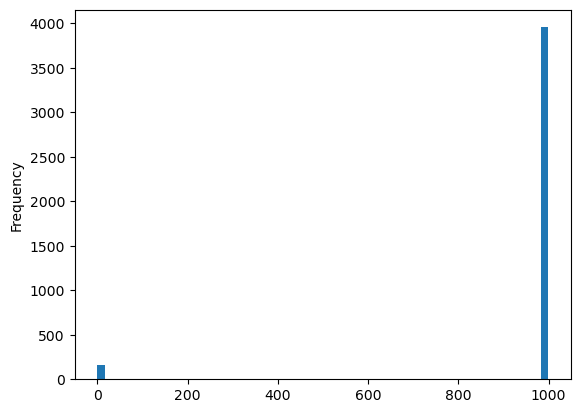

In [36]:
banks['pdays'].plot(kind='hist', bins=60)

In [37]:
banks.pdays.value_counts()

999    3957
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: pdays, dtype: int64

Ova promenljiva nam takođe ne daje puno informacija kada je predstavljena na kontinualnoj skali pa ćemo je kategorizovati u dve grupe: ljudi koji su bili kontaktirani i ljudi koji nisu bili kontaktirani od strane prethodne kampanje. Ove vrednosti ćemo smestiti u promenljivu `pdays_groups`. 

In [38]:
#grupisi vrednosti promenljie pdays

<AxesSubplot:>

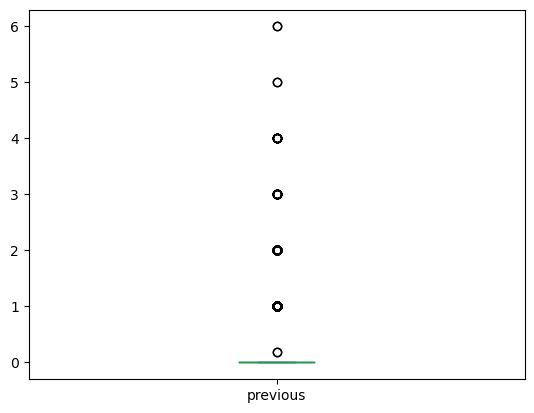

In [39]:
banks['previous'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

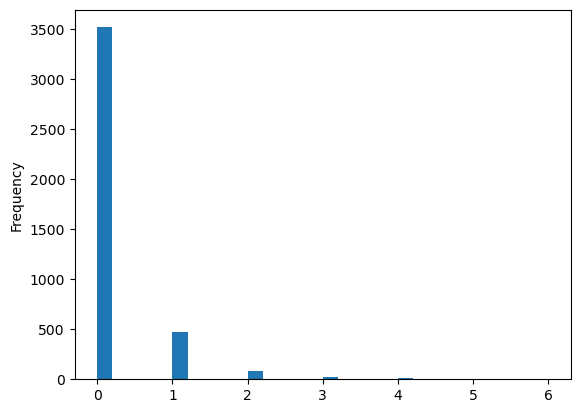

In [40]:
banks['previous'].plot(kind='hist', bins=30)

In [41]:
banks.previous.value_counts()

0.000000    3519
1.000000     475
2.000000      78
3.000000      25
4.000000      14
0.190522       2
5.000000       2
6.000000       2
Name: previous, dtype: int64

Ova promenljiva, kao ni prethodne, ne daje puno informacija u kontinualnom obliku pa ćemo je diskretizovati i smestiti u promenljivu `previous_groups`.

In [42]:
#diskretizuj promenljivu previous

<AxesSubplot:>

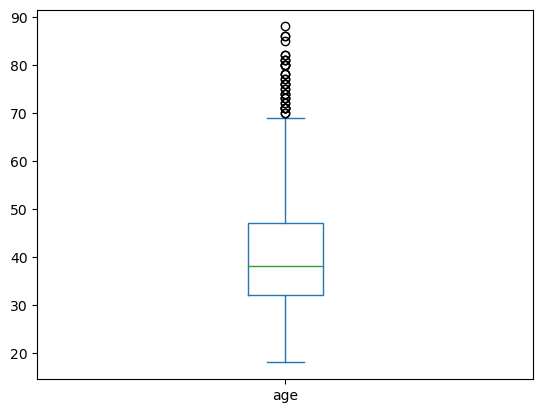

In [43]:
banks.age.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

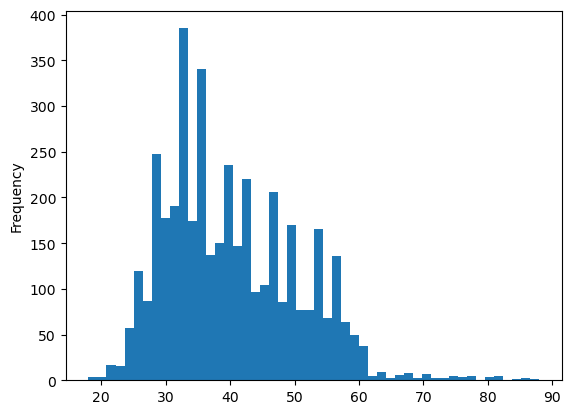

In [44]:
banks.age.plot(kind='hist', bins=50)

In [45]:
#vidi sta cemo za age

In [46]:
banks.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed?
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1011,2507,1264,3313,2174,3348,2651,1376,859,3521,3666


U šifraniku je rečeno da su za kategoričke promenljive nedostajuće vrednosti definisane sa vrednosti "unknown". Sada ćemo da vidimo kako ćemo da rešimo problem tih nedostajućih vrednosti. Prvo ćemo da sve vrednosti "unknown" promenimo u NaN vrednost radi lakšeg rada.

In [61]:
banks=banks.replace('unknown', np.nan)

In [67]:
banks.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
subscribed?         0
dtype: int64

Vidimo da postoji veliki broj nedostajućih vrednosti. Za početak smo odlučili da sve objekte koji imaju više od dve NaN vrednosti izbacimo iz skupa. 

In [75]:
banks=banks[banks.isna().sum(axis=1) < 2]

In [92]:
banks.isna().sum()

age                 0
job                17
marital            10
education         114
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
subscribed?         0
dtype: int64

In [ ]:
banks.default.value_counts()

Sledeće što se može primetiti jeste da attibut `default` ima veliki broj NaN vrednosti. Proverom svih vrednosti koje on ima dobili smo informaciju da samo jedan objekat ima vrednost "yes" dok su sve ostale "no". Samim tim ovaj atribut nam je aposlutno nepotreban i izbacujemo ga iz skupa.

In [91]:
banks=banks.drop('default', axis=1)

In [110]:
banks.job.value_counts()

admin.           991
blue-collar      838
technician       671
services         373
management       318
retired          159
self-employed    151
entrepreneur     143
housemaid        107
unemployed       105
student           77
Name: job, dtype: int64

In [109]:
banks=banks[~banks.job.isna()]

In [113]:
banks.marital.value_counts()

married     2388
single      1103
divorced     432
Name: marital, dtype: int64

In [116]:
banks.marital=banks.marital.fillna('married')

In [117]:
banks.marital.value_counts()

married     2398
single      1103
divorced     432
Name: marital, dtype: int64

In [119]:
banks=banks[~banks.education.isna()]

Što se tiče ostalih atributa, `education` je imao veći broj nedostajućih vrednosti, a pošto nismo mogli da nađemo način da ga zamenimo sa nekim drugim vrednostima odlučili smo da izbacimo sve objekte sa `NaN` vrednosti ovog atributa. Atribut `job` je imao vrlo malo nedostajučih vrednosti pa smo ih samo izbacili iz skupa, a što se tiče atributa `marital`, pošto veliki broj objekata ima vrednost "married" odlučili smo da popunimo `NaN` vrednosti sa ovom vrednosti (takođe jer postoji mali broj `NaN` vrednosti).

In [121]:
banks.shape

(3819, 20)

Sada nam ostaje da pretvorimo kategoričke vrednosti iz `object` u `category` tip. Takođe ćemo sve vrednosti koje imaju "no" i "yes" pretvoriti u `bool` tip.

In [ ]:
#kategorizuj promenljive

In [ ]:
#prikazi bar za svaki